In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Méthode de Monte Carlo

## Moments de la loi Gaussienne

Si $Z\sim\mathcal{N}(0,1)$, on a $\mathbb{E}[Z^{2p}]=\frac{(2p)!}{2^p p!}$.

In [62]:
p=7
Sref=math.factorial(2*p)/(math.factorial(p)*(2**p))

Taille de l'échantillon

In [63]:
N=1000

Initialisation, le nombre S va contenir l'estimation courante de la moyenne empirique, le vecteur SS va contenir toutes les valeurs passées

De même pour l'estimation de la variance

In [64]:
S=0
sigma2=0
SS=np.zeros(N)
ssigma2=np.zeros(N-1)

Utilisation des formules de mises à jour vues dans le premier TD

In [65]:
for n in range(0,N):
    z=np.random.randn(1)
    if n>0:
        sigma2=(1-1/n)*sigma2+(z**(2*p)-S)**2/(n+1)
        ssigma2[n-1]=sigma2
    S=(1-1/(n+1))*S+z**(2*p)/(n+1)
    SS[n]=S

Affichage des estimateurs

In [66]:
print('estimateur empirique:',S)
print('variance empirique:',sigma2)

print('valeur exacte:',Sref)
print('erreur relative:',(S-Sref)/Sref)

estimateur empirique: [95084.64133221]
variance empirique: [4.43114618e+12]
valeur exacte: 135135.0
erreur relative: [-0.29637295]


Tracé en fonction de $n$, de la moyenne empirique sur les $n$ premières valeurs et de l'intervalle de confiance gaussien à 95%

In [67]:
NN=np.arange(1,N+1)
NN2=np.arange(2,N+1)

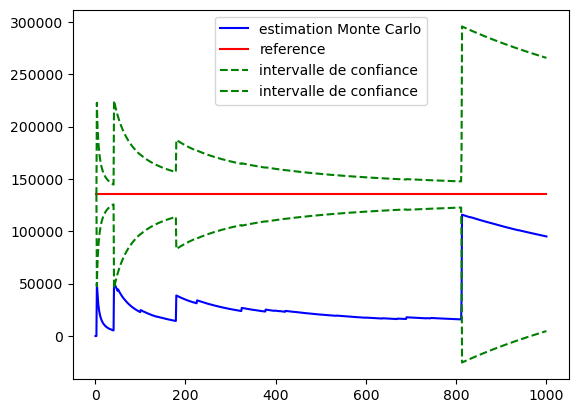

In [68]:
plt.plot(NN,SS,'b',label='estimation Monte Carlo')
plt.plot(NN,Sref*np.ones(N),'r',label='reference')

plt.plot(NN2,Sref+1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.plot(NN2,Sref-1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.legend()

## Moments exponentiels de la loi Gaussienne

Si $Z\sim\mathcal{N}(0,1)$, on a $\mathbb{E}[e^{aZ}]=e^{a^2/2}$.

In [76]:
a=4.
Sref=np.exp(a**2/2)

In [77]:
N=1000

In [78]:
S=0
sigma2=0
SS=np.zeros(N)
ssigma2=np.zeros(N-1)

In [79]:
for n in range(0,N):
    z=np.random.randn(1)
    if n>0:
        sigma2=(1-1/n)*sigma2+(np.exp(a*z)-S)**2/(n+1)
        ssigma2[n-1]=sigma2
    S=(1-1/(n+1))*S+np.exp(a*z)/(n+1)
    SS[n]=S

In [80]:
print('estimateur empirique:',S)
print('variance empirique:',sigma2)

print('valeur exacte:',Sref)
print('erreur relative:',(S-Sref)/Sref)

estimateur empirique: [572.47254925]
variance empirique: [29758996.22528213]
valeur exacte: 2980.9579870417283
erreur relative: [-0.80795685]


In [81]:
NN=np.arange(1,N+1)
NN2=np.arange(1,N)

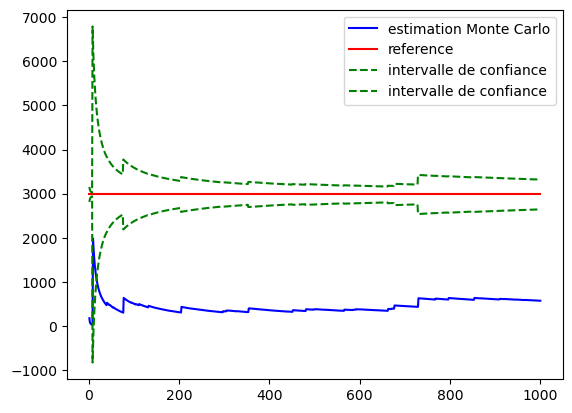

In [82]:
plt.plot(NN,SS,'b',label='estimation Monte Carlo')
plt.plot(NN,Sref*np.ones(N),'r',label='reference')

plt.plot(NN2,Sref+1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.plot(NN2,Sref-1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.legend()

## Approximation de pi

$\pi=\int_0^1 4\sqrt{1-x^2} dx$

In [ ]:
Sref=np.pi

In [ ]:
N=1000

In [ ]:
def f(u):
    return 4*np.sqrt(np.abs(1-u**2))

In [ ]:
S=0
sigma2=0
SS=np.zeros(N)
ssigma2=np.zeros(N-1)

In [ ]:
for n in range(0,N):
    u=np.random.rand(1)
    x=f(u)
    if n>0:
        sigma2=(1-1/n)*sigma2+(x-S)**2/(n+1)
        ssigma2[n-1]=sigma2
    S=(1-1/(n+1))*S+x/(n+1)
    SS[n]=S

In [ ]:
print('estimateur empirique:',S)
print('variance empirique:',sigma2)

print('valeur exacte:',Sref)
print('erreur relative:',(S-Sref)/Sref)

In [ ]:
NN=np.arange(1,N+1)
NN2=np.arange(1,N)

In [ ]:
plt.plot(NN,SS,'b',label='estimation Monte Carlo')
plt.plot(NN,Sref*np.ones(N),'r',label='reference')

plt.plot(NN2,Sref+1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.plot(NN2,Sref-1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.legend()

Autre méthode

In [ ]:
N=1000

In [ ]:
S=0
sigma2=0
SS=np.zeros(N)
ssigma2=np.zeros(N-1)

In [ ]:
for n in range(0,N):
    u=np.random.rand(1)
    v=np.random.rand(1)
    if u**2+v**2<1:
        x=4
    else:
        x=0
    if n>0:
        sigma2=(1-1/n)*sigma2+(x-S)**2/(n+1)
        ssigma2[n-1]=sigma2
    S=(1-1/(n+1))*S+x/(n+1)
    SS[n]=S

In [ ]:
print('estimateur empirique:',S)
print('variance empirique:',sigma2)

print('valeur exacte:',Sref)
print('erreur relative:',(S-Sref)/Sref)

In [ ]:
NN=np.arange(1,N+1)
NN2=np.arange(1,N)

In [ ]:
plt.plot(NN,SS,'b',label='estimation Monte Carlo')
plt.plot(NN,Sref*np.ones(N),'r',label='reference')

plt.plot(NN2,Sref+1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.plot(NN2,Sref-1.96*np.sqrt(ssigma2)/np.sqrt(NN2+1),'g',linestyle='dashed',label='intervalle de confiance')
plt.legend()